Regressão Linear

In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

In [153]:
data = "emprestimos_biblioteca_junho_2023.xlsx"
df = pd.read_excel(data, engine='openpyxl')

In [154]:
df['data_emprestimo'] = pd.to_datetime(df['DATA_EMPRESTIMO_CHAR'], errors='coerce')
df['data_devolucao'] = pd.to_datetime(df['DATA_DEV_EFETIVA_CHAR'], errors='coerce')

df['dias_emprestados'] = (df['data_devolucao'] - df['data_emprestimo']).dt.days

df = df[df['dias_emprestados'].notnull() & (df['dias_emprestados'] >= 0)]

df_grouped = df.groupby(['dias_emprestados']).size().reset_index(name='qtd_emprestimos')

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17800\4138738703.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['data_devolucao'] = pd.to_datetime(df['DATA_DEV_EFETIVA_CHAR'], errors='coerce')


In [155]:
# Treinar o modelo e prever
X = df_grouped[['dias_emprestados']]
y = df_grouped['qtd_emprestimos']

modelo = LinearRegression()
modelo.fit(X, y)

df_grouped['predict'] = modelo.predict(X)

a = modelo.intercept_
b = modelo.coef_[0]
print(f"Quantidade de obras emprestadas = {b:.2f} * Tempo de empréstimo em dias + {a:.2f}")

Quantidade de obras emprestadas = -0.08 * Tempo de empréstimo em dias + 24.25


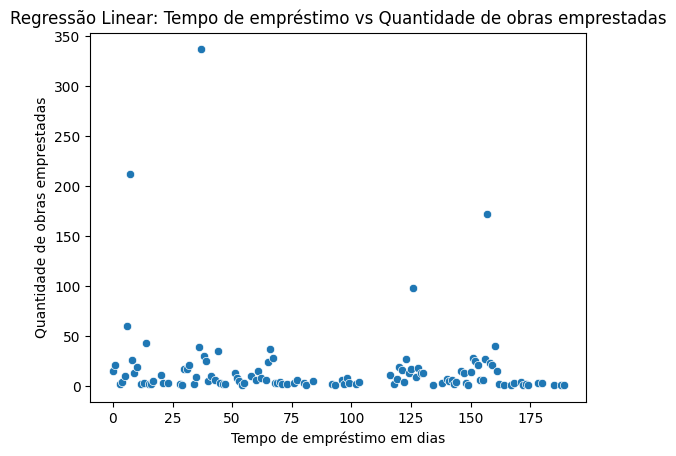

In [156]:
# Gráfico de dispersão
sns.scatterplot(x="dias_emprestados", y="qtd_emprestimos", data=df_grouped)
plt.title("Regressão Linear: Tempo de empréstimo vs Quantidade de obras emprestadas")
plt.xlabel("Tempo de empréstimo em dias")
plt.ylabel("Quantidade de obras emprestadas")
plt.show()

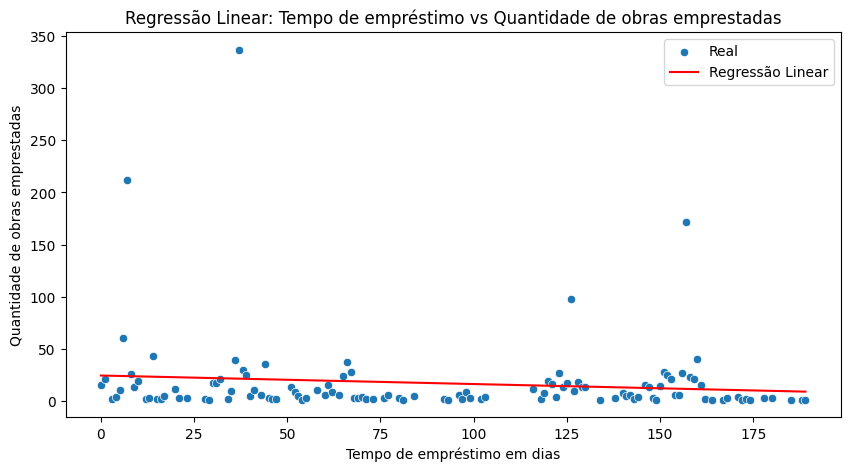

In [157]:
# Linha de regressão
plt.figure(figsize=(10, 5))
sns.scatterplot(x='dias_emprestados', y='qtd_emprestimos', data=df_grouped, label='Real')
sns.lineplot(x='dias_emprestados', y='predict', data=df_grouped, color='red', label='Regressão Linear')
plt.title(f'Regressão Linear: Tempo de empréstimo vs Quantidade de obras emprestadas')
plt.xlabel('Tempo de empréstimo em dias')
plt.ylabel('Quantidade de obras emprestadas')   
plt.legend()
plt.show()


In [158]:
# Avaliar o modelo
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

r2 = r2_score(y, df_grouped["predict"])
mae = mean_absolute_error(y, df_grouped["predict"])
mse = mean_squared_error(y, df_grouped["predict"])
rmse = mse ** 0.5

print(f'R²: {r2:.2f}')
print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')

R²: 0.01
MAE: 17.37
MSE: 1588.26
RMSE: 39.85


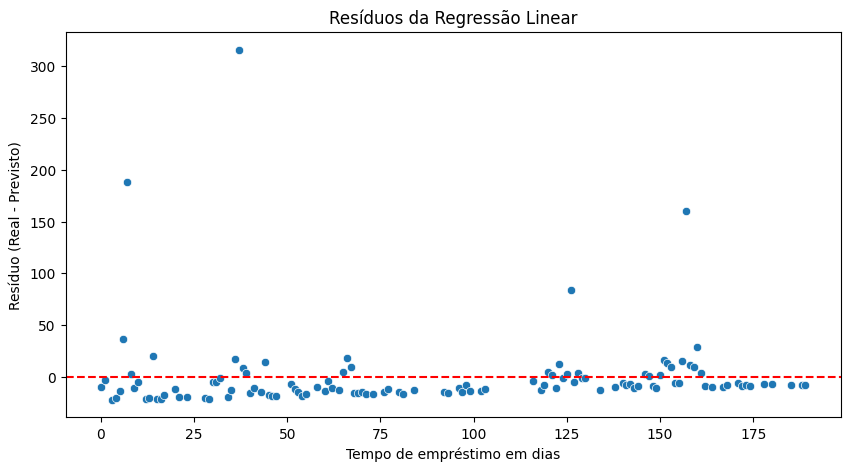

In [159]:
# Análise de resíduos
df_grouped['residuos'] = df_grouped['qtd_emprestimos'] - df_grouped['predict']

plt.figure(figsize=(10, 5))
sns.scatterplot(x=df_grouped['dias_emprestados'], y=df_grouped['residuos'])
plt.axhline(0, color='red', linestyle='--')
plt.title('Resíduos da Regressão Linear')
plt.xlabel('Tempo de empréstimo em dias')
plt.ylabel('Resíduo (Real - Previsto)')
plt.show()